<a href="https://colab.research.google.com/github/jidemaestri/Financial-Markets/blob/master/05_Wiener_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wiener Process and Random Walks

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr

El proceso de Wiener es un modelo matemático que se utiliza en finanzas para representar el movimiento aleatorio del precio de un activo financiero, debido a la incertidumbre y la aleatoriedad en los mercados. 

En el proceso de Wiener, se asume que los cambios en el precio de un activo financiero siguen un movimiento Browniano (un proceso estocástico continuo) que está compuesto por incrementos aleatorios e independientes distribuidos normalmente. Esto significa que los cambios en el precio del activo financiero en un período de tiempo pequeño están normalmente distribuidos alrededor de cero, lo que indica que es igualmente probable que el precio suba o baje en un período corto.

In [ ]:
def wiener_process(dt=0.1, x0=0, n=1000):

  #initialize W(t) with zeros
  #n is the number of epochs
  W = np.zeros(n+1)

  #creating N+1 timesteps (t=0,1,2,3,..N)

  t = np.linspace(x0, n, n+1)

  #Wiener process - Normal distribution, with mean 0 and variance dt.. N(0, dt)

  W[1:n+1] = np.cumsum(np.random.normal(0, np.sqrt(dt), n))       #sqrt(dt) is the standard deviation

  return t, W 

In [ ]:
def plot_process (t,W):
    fig, ax = plt.subplots(figsize=(36,14))
    ax.plot(t, W)
    ax.set(xlabel='Time (t)', ylabel='Wiener-process (W(t))', title='Wiener Process')
    plt.show()


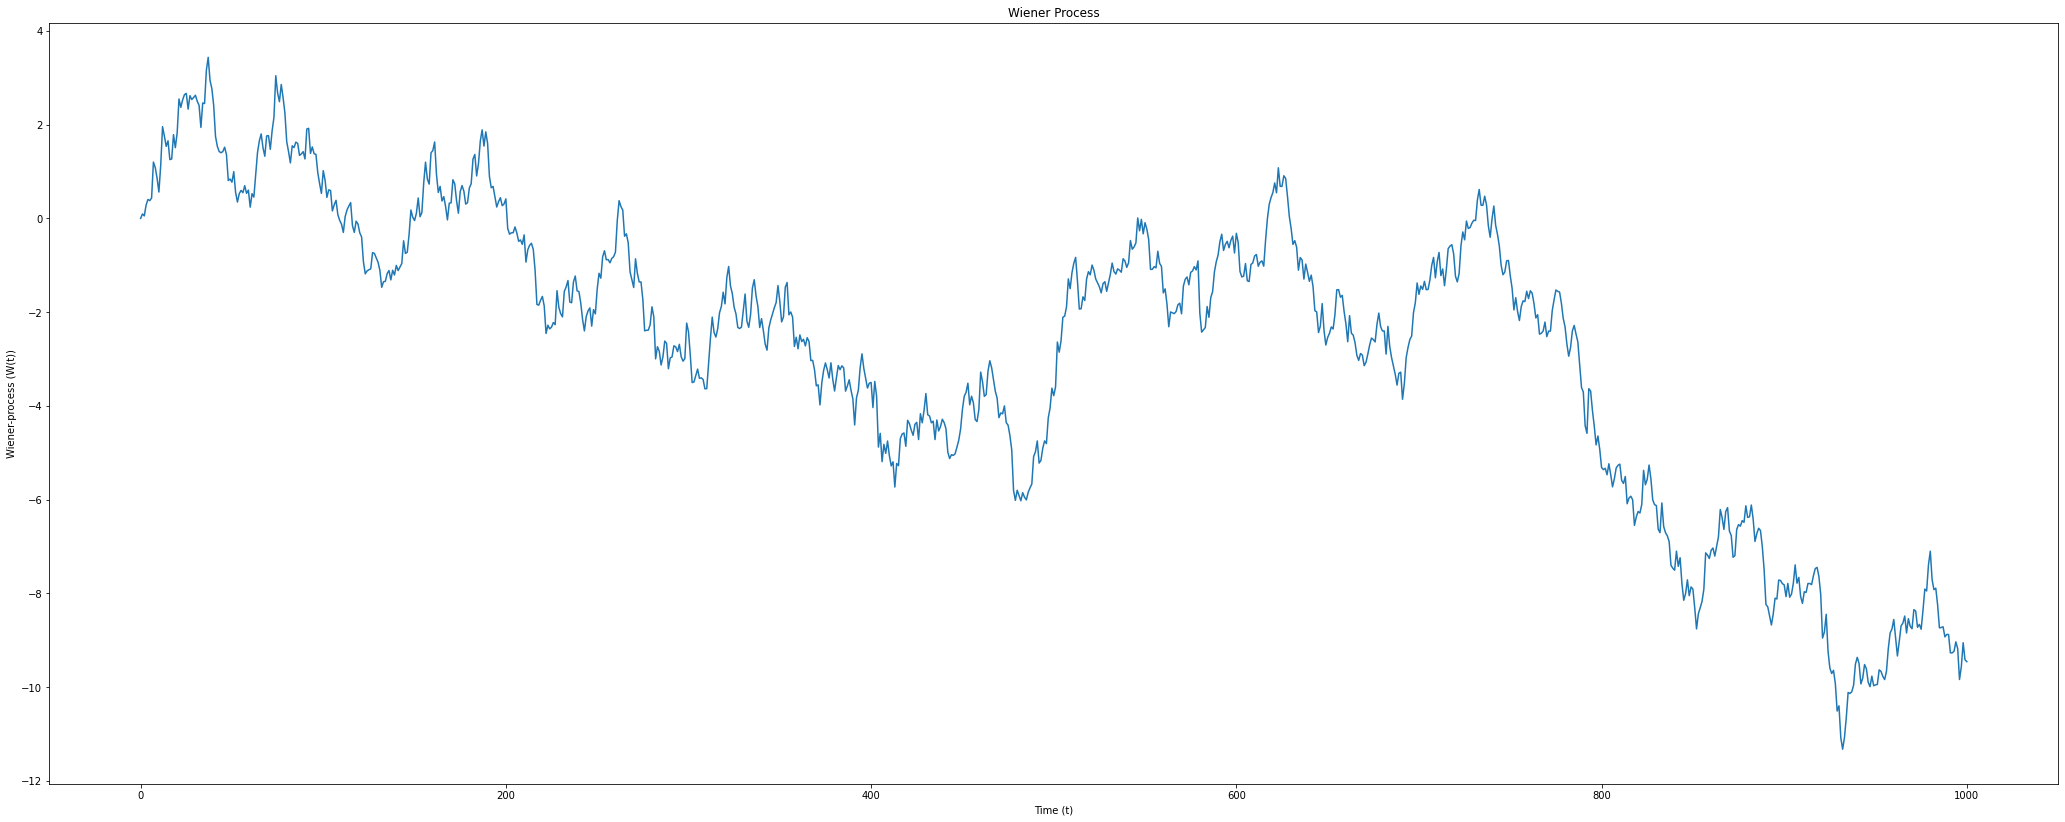

In [ ]:
if __name__ == "__main__":
  time, data = wiener_process()
  plot_process(time, data)


## Simulating Random Walk - Geometric Brownian Motion

266807b65fd50635526a766c0c89a2913085d0c2.svg

La Geometric Brownian Motion (GBM) es un modelo matemático que se utiliza comúnmente para describir el movimiento de los precios de los activos financieros en el mercado. Su finalidad es proporcionar una estimación de cómo evolucionará el precio de un activo en el futuro, basándose en su comportamiento histórico. La GBM se basa en la teoría de los procesos estocásticos, lo que significa que los cambios en el precio de un activo no se pueden predecir con certeza, sino que están sujetos a cierto grado de incertidumbre. 

In [ ]:
def simulate_geometric_random_walk(S0, T=2, N=1000, mu=0.1, sigma=0.05):
  dt=T/N
  t = np.linspace(0, T, N)        #array between 0 and T, with N values
  
  #standard normal distribution N(0,1)
  W = np.random.standard_normal(size=N)
  W = np.cumsum(W) * np.sqrt(dt)  #Wiener process

  X = (mu - 0.5 * sigma**2) * t + sigma*W
  S = S0 * np.exp(X)
  #print(W)
  
  return t, S

In [ ]:
def plot_simulation(t,S):
    fig, ax = plt.subplots(figsize=(36,14))
    ax.plot(t, S, c='r')      #time and Stock Prices
    ax.set(xlabel='Time (t)', ylabel='Stock Prices (S(t))', title='Geometric Brownian Motion')
    plt.show()


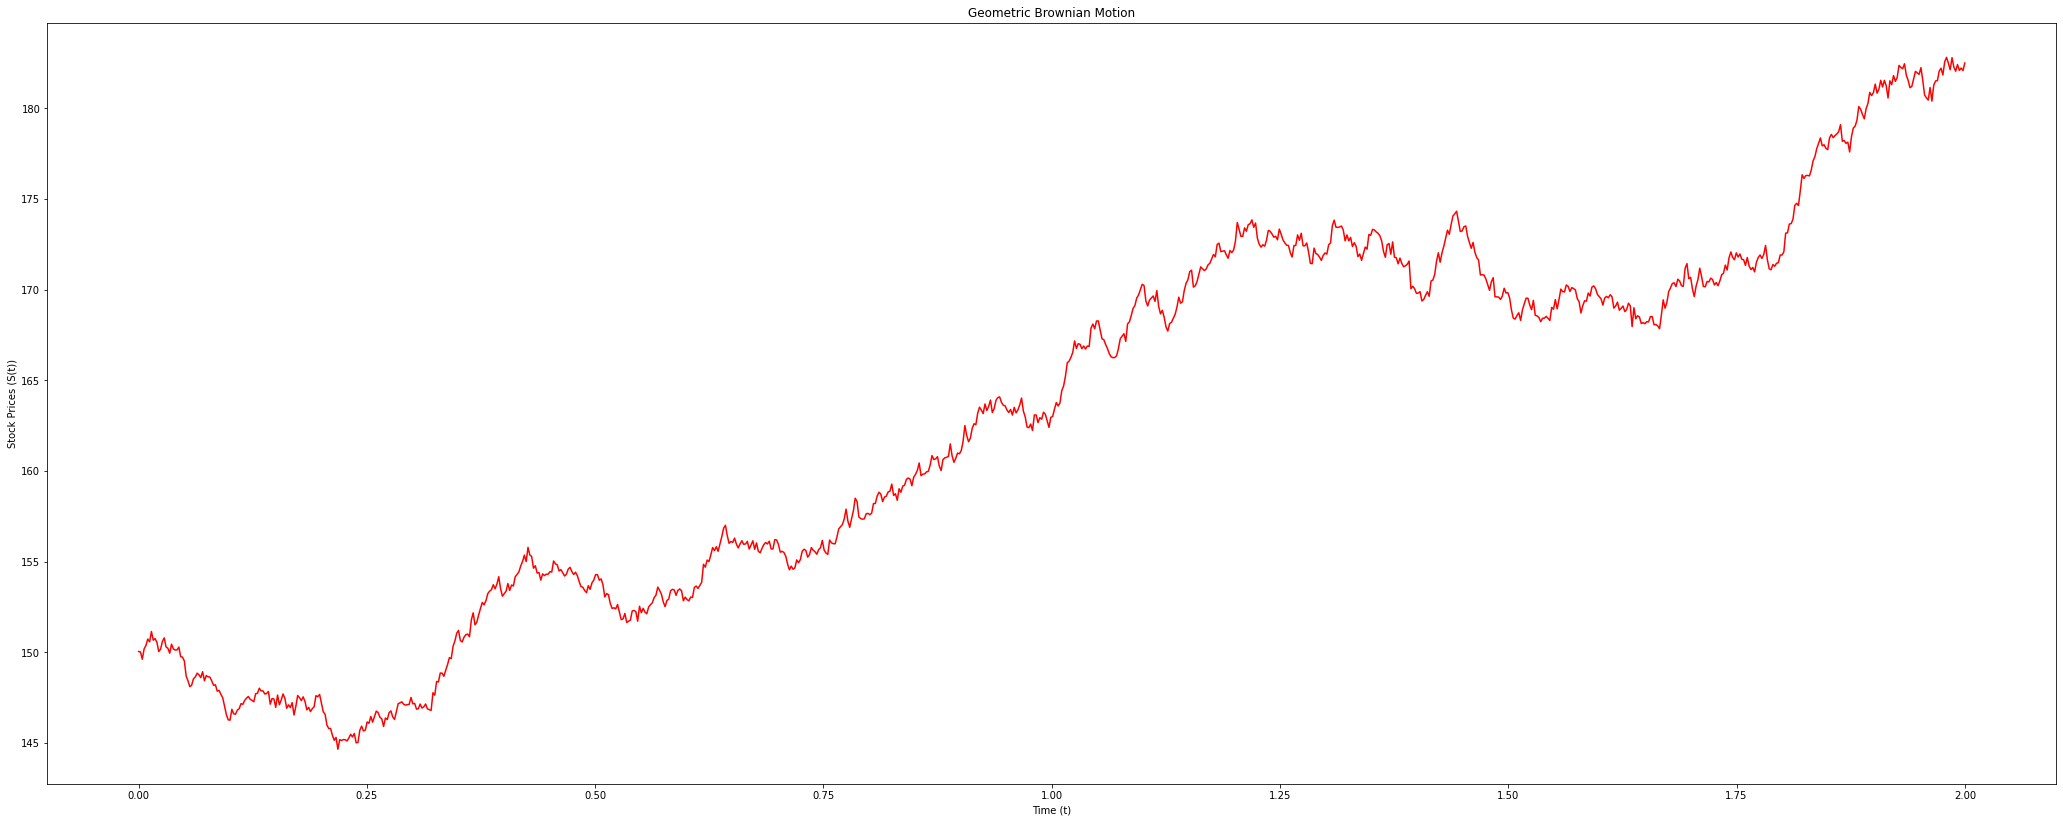

In [ ]:
if __name__ == '__main__':
    time, data = simulate_geometric_random_walk(150)
    plot_simulation(time,data)